# Student Performance Analysis

This notebook analyzes a student performance dataset to identify factors correlated with final grades. We'll explore the dataset, generate descriptive statistics, visualize relationships between variables, and investigate how different factors impact student performance.

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

### Explanation

In this section, we're importing the essential libraries for our data analysis:
- **pandas**: For data manipulation and analysis
- **numpy**: For numerical operations
- **matplotlib.pyplot**: For creating plots and visualizations
- **seaborn**: For enhanced statistical visualizations

We're also setting some visualization preferences:
- Using seaborn's "whitegrid" style for cleaner charts
- Setting a default figure size of 8×5 inches for all plots

## Load the Dataset

In [2]:
# Load the dataset (CSV file should be in the same directory)
df = pd.read_csv("student-mat.csv", sep=';')  # Use sep=';' for correct parsing

### Explanation

Here we're loading the dataset from a CSV file named "student-mat.csv". 

Important notes:
- The `sep=';'` parameter specifies that the fields in the CSV file are separated by semicolons rather than commas
- The CSV file must be located in the same directory as this notebook
- The data is loaded into a pandas DataFrame object named `df` which we'll use throughout the analysis

This dataset contains student performance data, including demographic information, study habits, and grades.

## 1. Preview & Summary Statistics

In [3]:
print("Preview of the dataset:")
df.head()

Preview of the dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Explanation

The `head()` method displays the first 5 rows of the DataFrame. This gives us a quick preview of the data structure, column names, and the types of values contained in each column. It's always a good practice to examine the raw data before proceeding with analysis to understand what we're working with.

In [4]:
print("Summary statistics for numerical features:")
df.describe()

Summary statistics for numerical features:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Explanation

The `describe()` method generates descriptive statistics for all numerical columns in the dataset:

- **count**: Number of non-null values in each column
- **mean**: Average value
- **std**: Standard deviation (measure of data spread)
- **min**: Minimum value
- **25%**: First quartile (25th percentile)
- **50%**: Median (50th percentile)
- **75%**: Third quartile (75th percentile)
- **max**: Maximum value

These statistics help us understand the distribution of each numerical feature and identify potential outliers or unusual data characteristics.

In [5]:
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Explanation

This code checks for missing values in our dataset by:
1. Using `isnull()` to create a DataFrame of the same shape where each cell is `True` if the value is missing or `False` otherwise
2. Using `sum()` to count the number of missing values in each column

Identifying missing values is crucial in data analysis because they can significantly impact our results. If many values are missing for certain columns, we might need to implement data cleaning strategies like imputation or removing affected rows/columns.

## 2. Correlation Heatmap (numeric features only)

In [6]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

print("Correlation matrix:")
correlation_matrix

Correlation matrix:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


### Explanation

Here we're calculating the correlation coefficients between all numerical features in our dataset using the Pearson correlation method. 

The `numeric_only=True` parameter ensures that only numerical columns are included in the calculation. The resulting correlation matrix shows how strongly each pair of variables is related:

- Values close to 1 indicate a strong positive correlation (as one variable increases, the other also increases)
- Values close to -1 indicate a strong negative correlation (as one variable increases, the other decreases)
- Values close to 0 indicate little to no linear relationship

This table helps identify which variables might be related to student performance.

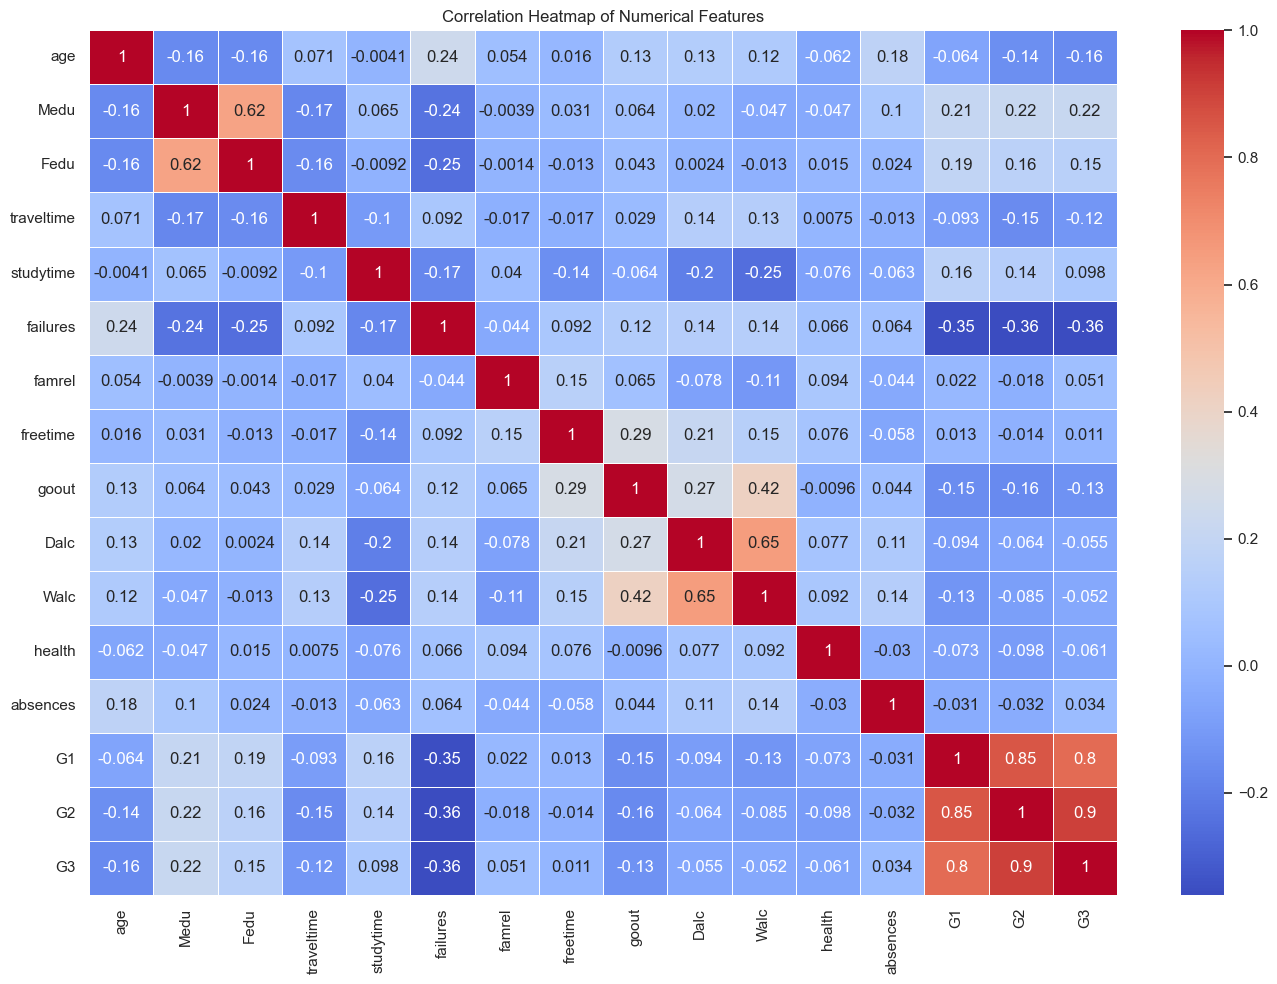

In [7]:
# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

### Explanation

This code creates a visual representation of the correlation matrix using a heatmap:

- `figsize=(14, 10)` sets a larger figure size to accommodate the heatmap
- `annot=True` displays the correlation values inside each cell
- `cmap='coolwarm'` uses a color scheme where red represents positive correlations and blue represents negative correlations
- `linewidths=0.5` adds thin white lines between cells for better readability

The heatmap makes it easy to identify patterns and strong correlations at a glance. Look for dark red or dark blue cells, which indicate strong positive or negative correlations, respectively. Pay special attention to the rows and columns related to G3 (final grade), as these show which factors are most strongly associated with student performance.

## 3. Relationships with Final Grade (G3)

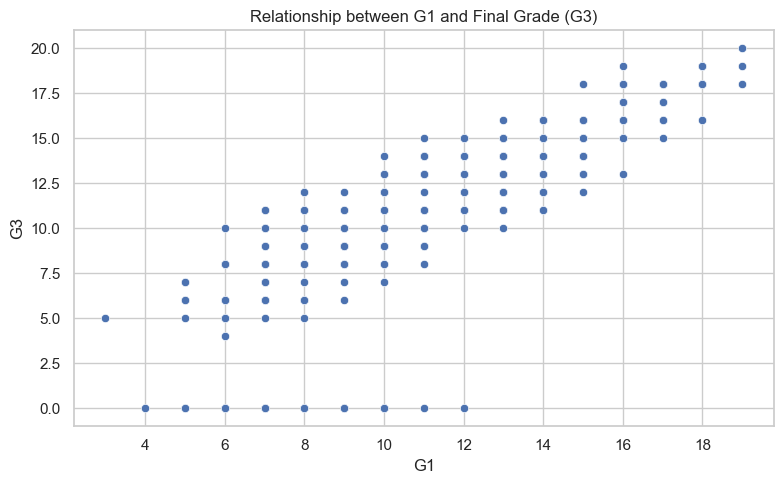

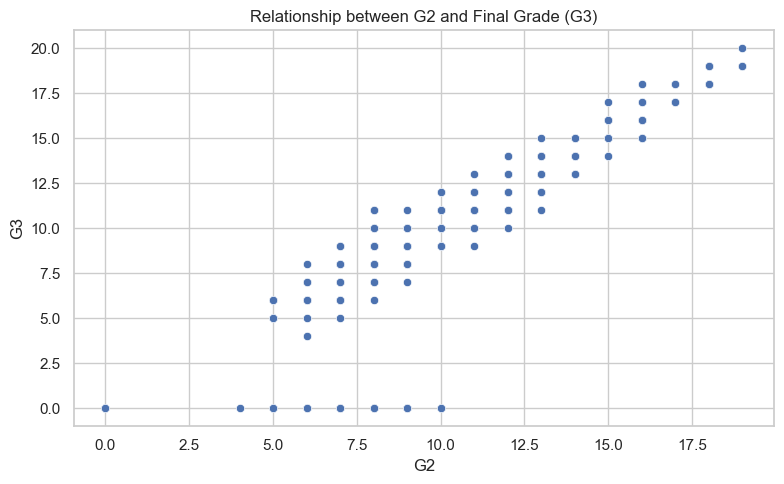

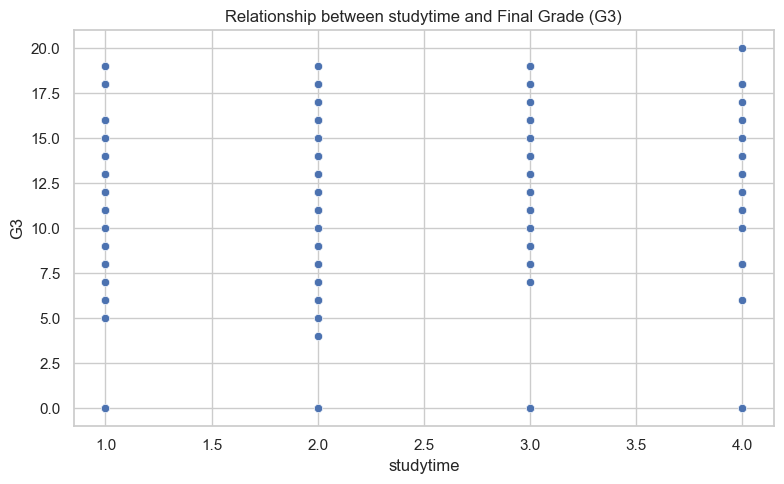

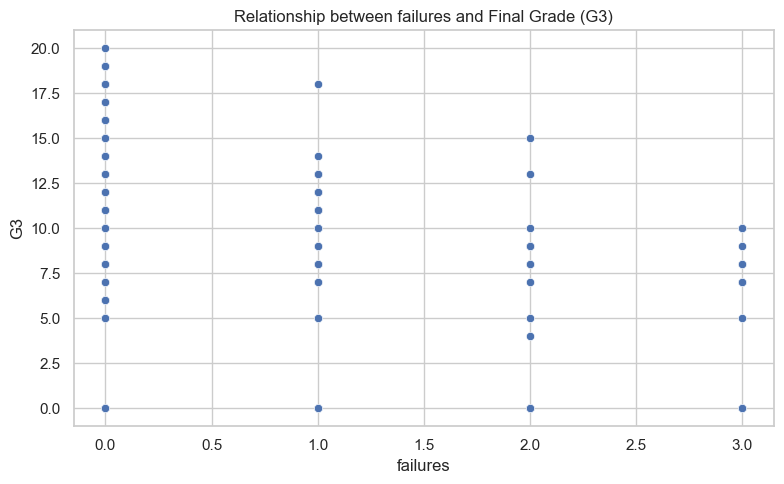

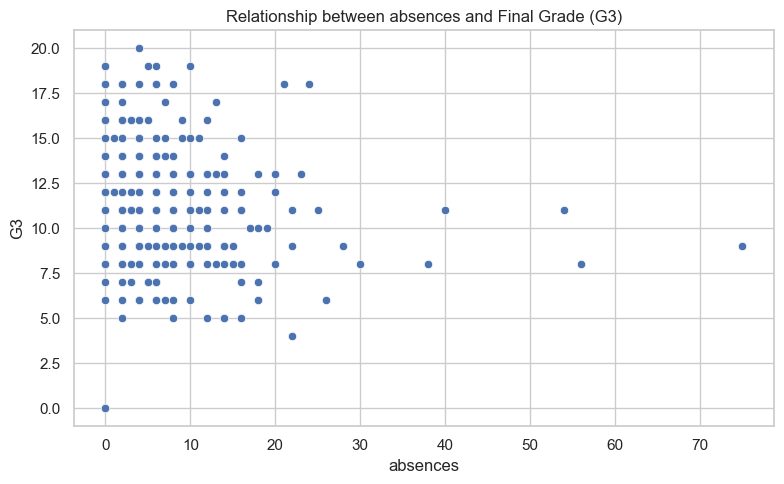

In [8]:
# Scatter plots for selected features vs G3
features_to_plot = ['G1', 'G2', 'studytime', 'failures', 'absences']

for feature in features_to_plot:
    plt.figure()
    sns.scatterplot(data=df, x=feature, y='G3')
    plt.title(f'Relationship between {feature} and Final Grade (G3)')
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.tight_layout()
    plt.show()

### Explanation

This section creates scatter plots to visualize relationships between selected features and the final grade (G3). We're focusing on five potentially important predictors:

- **G1**: First period grade
- **G2**: Second period grade
- **studytime**: Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures**: Number of past class failures
- **absences**: Number of school absences

For each feature, we create a separate scatter plot where:
- The x-axis represents the feature value
- The y-axis represents the final grade (G3)
- Each point represents one student

These visualizations help us understand the relationship patterns between each predictor and the final grade. Look for visible trends like:
- Upward sloping patterns (positive correlation)
- Downward sloping patterns (negative correlation)
- Clustering of points
- Potential outliers

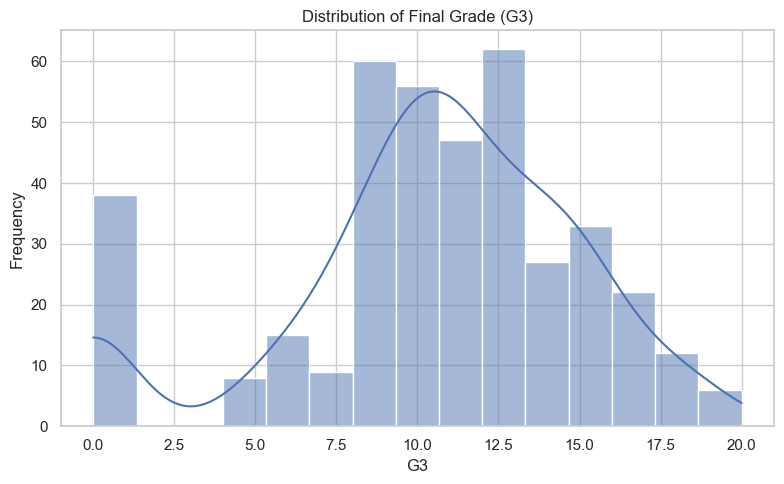

In [9]:
# Histogram of G3 distribution
plt.figure()
sns.histplot(df['G3'], kde=True, bins=15)
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("G3")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Explanation

This histogram visualizes the distribution of final grades (G3) across all students in the dataset:

- The x-axis represents possible final grade values
- The y-axis shows how many students received each grade
- `bins=15` divides the range of grades into 15 intervals
- `kde=True` adds a kernel density estimation curve, which is a smoothed version of the histogram

Understanding the distribution of final grades helps us identify:
- The most common grade ranges
- Whether grades follow a normal distribution or are skewed
- Potential clusters or gaps in the grade distribution
- Whether there are unusual peaks or outliers

This information is valuable for understanding the overall performance pattern before we examine specific factors that might influence it.

## 4. Impact of Categorical Features on G3

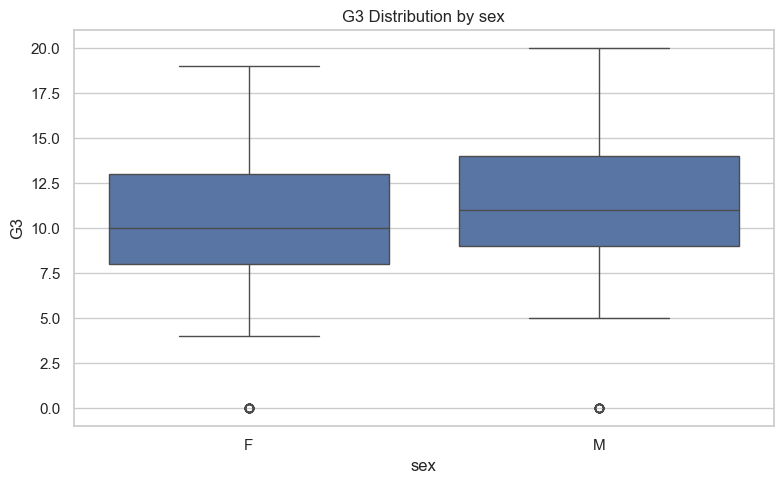

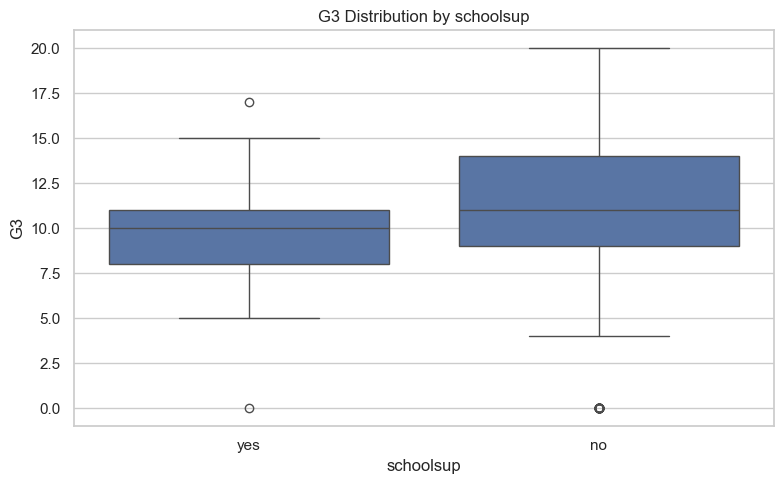

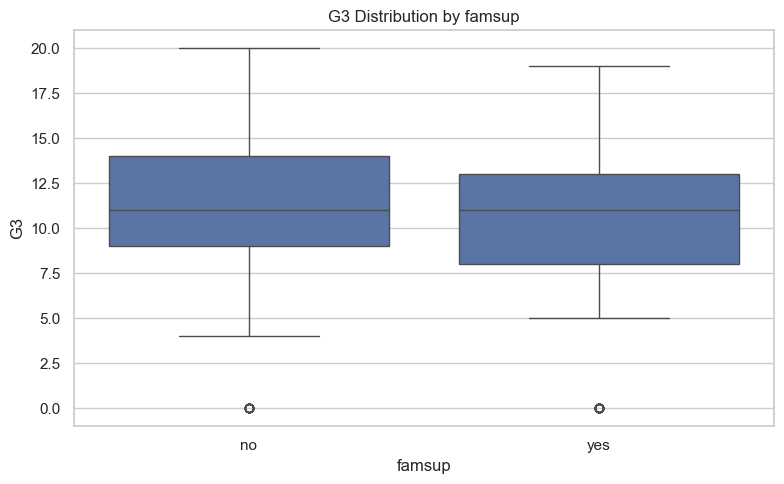

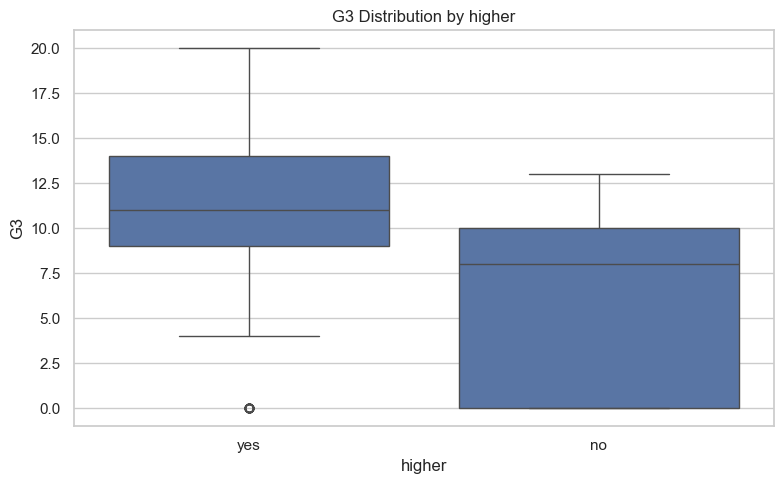

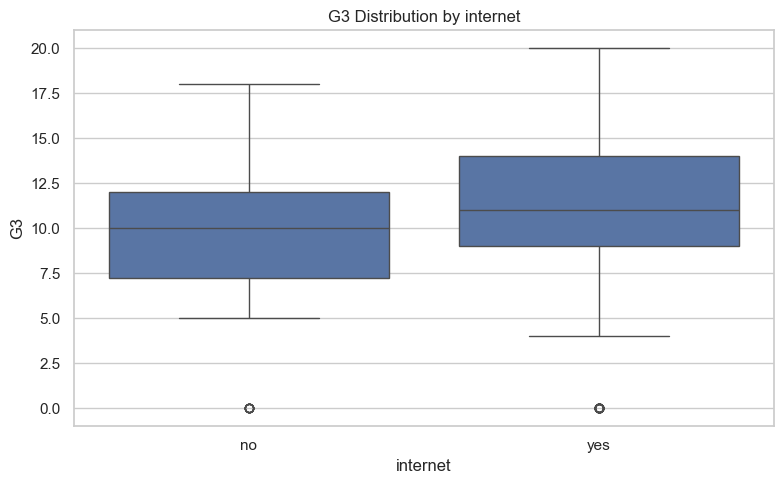

In [10]:
# Boxplots to compare G3 across categorical features
categorical_features = ['sex', 'schoolsup', 'famsup', 'higher', 'internet']

for cat in categorical_features:
    plt.figure()
    sns.boxplot(data=df, x=cat, y='G3')
    plt.title(f"G3 Distribution by {cat}")
    plt.tight_layout()
    plt.show()

### Explanation

This final section explores how categorical features might influence final grades by creating boxplots for selected categorical variables:

- **sex**: Student's gender ('F' - female or 'M' - male)
- **schoolsup**: Extra educational support ('yes' or 'no')
- **famsup**: Family educational support ('yes' or 'no')
- **higher**: Wants to take higher education ('yes' or 'no')
- **internet**: Internet access at home ('yes' or 'no')

For each categorical feature, we create a box plot where:
- The x-axis shows the different categories
- The y-axis represents the final grade (G3)
- Each box shows the distribution of grades within that category

Box plot components:
- The central line represents the median (50th percentile)
- The box extends from the 25th to the 75th percentile (interquartile range or IQR)
- The whiskers extend to 1.5 times the IQR
- Points beyond the whiskers are potential outliers

These visualizations help us identify if certain categorical factors are associated with different grade distributions. Look for differences in:
- Median values between categories
- Spread or variability of grades
- Presence of outliers
- Overall shape of the distributions

Such differences might suggest that these categorical factors influence student performance.

## Conclusion

This analysis explores various factors that might influence student performance, focusing on the relationship between student characteristics, study habits, and final grades. 

The notebook provides:
1. A comprehensive look at the dataset structure and quality
2. Identification of correlations between numerical variables
3. In-depth examination of how specific features relate to final grades
4. Analysis of how categorical factors might influence academic performance

These insights can help educators and administrators identify factors that contribute to student success and areas where interventions might be beneficial.